In [511]:
import numpy as np
import pickle
import json
from scipy import sparse
import os
import matplotlib.pyplot as plt

In [512]:
clustering_results_path = './sigma-girl-MIIRL/data_starcraft/results_all.pkl'
clustering_results = pickle.load(open(clustering_results_path, "rb"))

In [513]:
clustering_results[0][1]

array([[0.28171398, 0.2988086 , 0.41947742],
       [0.39156281, 0.30916057, 0.29927662]])

In [514]:
actions = pickle.load(open('./MSC/exported_replays/actions_TerranVsTerran_100_150_3.pkl', 'rb'))
states = pickle.load(open('./MSC/exported_replays/states_TerranVsTerran_100_150_[16:26].pkl', 'rb'))
rewards = pickle.load(open('./MSC/exported_replays/rewards_old_TerranVsTerran_100_150_[ 20  21 -22].pkl', 'rb'))

In [515]:
macro_action_space = ['Build', 'TrainWorker', 'TrainArmy', 'None']

terran_stat = json.load(open('./MSC/parsed_replays/Stat/Terran.json'))
id_reversed = {value: key for (key, value) in terran_stat['action_id'].items()}

In [516]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
num_replays = 100
paths = os.listdir(dir_path)
raw_data = {}
for i in range(num_replays):
    index = str(i)
    data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
    raw_data[index] = data

In [517]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
paths = os.listdir(dir_path)

index = str(0)
data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
data[151][16]


0.0009014829394353576

In [518]:
num_clusters =  len(clustering_results[0][0])
num_clusters
cluster_names = ["cluster " + str(i) for i in range(num_clusters)]

In [519]:
num_clusters
clustering_results[0]

(array([[9.98394922e-01, 2.96531297e-07, 3.50798439e-01, 5.55072496e-46,
         9.99998925e-01, 9.99848385e-01, 3.41457157e-01, 4.82671301e-01,
         9.99999897e-01, 3.46763104e-51, 5.20417012e-01, 4.96629184e-01,
         6.74193732e-01, 7.01970069e-01, 9.99992601e-01, 7.31064416e-01,
         1.00000000e+00, 9.99964855e-01, 9.98294036e-02, 9.82683905e-01,
         9.80199538e-01, 3.04611438e-02, 6.52778218e-02, 9.05458898e-01,
         1.69994890e-02, 5.98727725e-10, 1.12698375e-03, 8.35624921e-01,
         9.82828475e-01, 4.80970404e-01, 1.19039461e-05, 4.99437360e-01,
         1.33432478e-48, 6.60189074e-01, 9.69090362e-01, 5.08096509e-01,
         1.00000000e+00, 4.84914644e-01, 4.80214245e-04, 6.64922569e-01,
         9.03849184e-01, 1.97874070e-06, 7.55713381e-01, 5.02888351e-01,
         9.45285435e-01, 9.99992540e-01, 9.97932435e-01, 8.96221939e-01,
         8.76060975e-01, 1.71107092e-13, 3.84629196e-01, 9.99819932e-01,
         1.00000000e+00, 1.71760997e-05, 8.29464548

In [520]:
# get cluster assignments
cluster_assignments = [0] * num_replays
for i in range(num_replays):
    cluster_probs = clustering_results[0][0][:, i]
    cluster_assignments[i] = np.argmax(cluster_probs)

In [521]:
# compute cluster win/loss distributions
outcome_distributions = [[] for i in range(num_clusters)]
overall_distribution = []
for i in range(num_replays):
    index = str(i)
    outcome = str(raw_data[index][0][0])
    overall_distribution.append(outcome)
    outcome_distributions[cluster_assignments[i]].append(outcome)

In [522]:
for i in range(len(outcome_distributions)):
    print(f'Cluster {i} size: {len(outcome_distributions[i])} ')

Cluster 0 size: 59 
Cluster 1 size: 41 


Text(0.5, 1.0, 'Win/Loss Count')

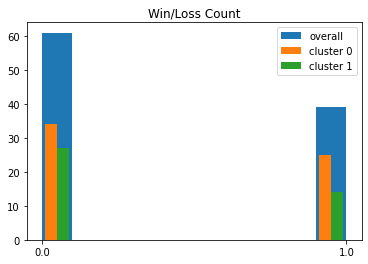

In [523]:
# visualize distributions
fig, ax = plt.subplots()
ax.hist(overall_distribution, label='overall')
ax.hist(outcome_distributions, label=cluster_names)
ax.legend()
ax.set_title("Win/Loss Count")

Text(0.5, 1.0, 'Cumulative Score at end of 150 frames')

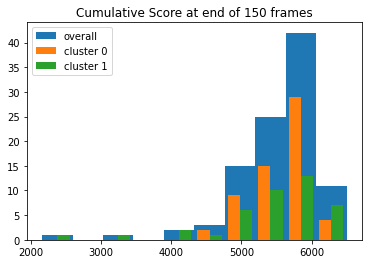

In [524]:
# compute score distributions
number_frames = 150
score_distributions = [[] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    cumulative_score = raw_data[index][number_frames - 1][2]
    score_distributions[cluster_assignments[i]].append(cumulative_score)

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(score_distributions)), label='overall')
ax.hist(score_distributions, label=cluster_names)
ax.legend()
ax.set_title("Cumulative Score at end of {} frames".format(number_frames))

Text(0.5, 1.0, 'Average  worker supply count per frame')

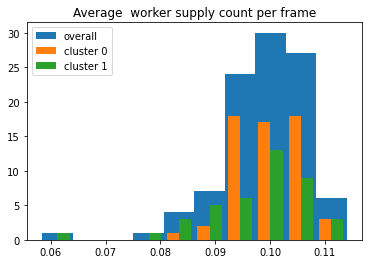

In [535]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions[cluster_assignments[i]].append(states[str(i)][:, 5].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions)), label='overall')
ax.hist(worker_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average  worker supply count per frame")

Text(0.5, 1.0, 'Average standardized worker supply count per frame')

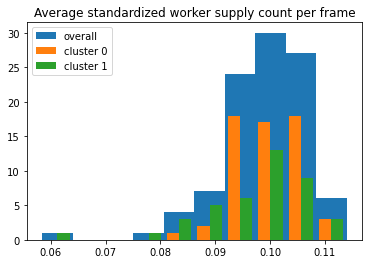

In [526]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions_new = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions_new[cluster_assignments[i]].append(rewards[str(i)][:, 1].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions_new)), label='overall')
ax.hist(worker_distributions_new, label=cluster_names)
ax.legend()
ax.set_title("Average standardized worker supply count per frame")

Text(0.5, 1.0, 'Average (normalized) army supply count per frame')

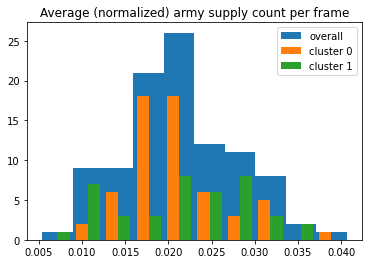

In [537]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

army_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    army_distributions[cluster_assignments[i]].append(states[str(i)][:, 4].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(army_distributions)), label='overall')
ax.hist(army_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average (normalized) army supply count per frame")

Text(0.5, 1.0, 'Average (normalized) idle worker count per frame')

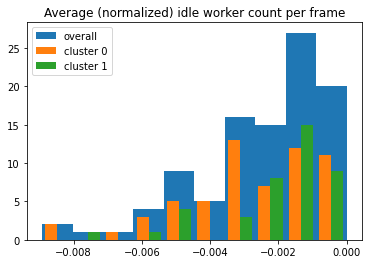

In [539]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

army_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    army_distributions[cluster_assignments[i]].append(rewards[str(i)][:, 2].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(army_distributions)), label='overall')
ax.hist(army_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average (normalized) idle worker count per frame")

In [528]:
clustering_results[0][1]

array([[0.28171398, 0.2988086 , 0.41947742],
       [0.39156281, 0.30916057, 0.29927662]])

In [529]:
np.mean(army_distributions[0])

0.021168761568858923

In [530]:
#np.mean(army_distributions[2])

In [531]:
np.mean(worker_distributions[0])

0.10025002415785164

In [532]:
np.mean(worker_distributions[1])

0.09710210527339874

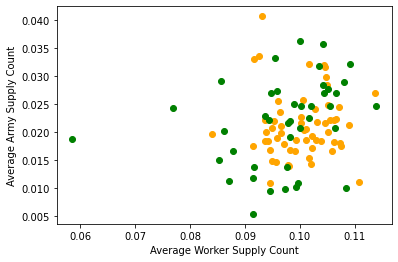

In [533]:
fig, ax = plt.subplots()
colors = ['orange', 'green', 'red', 'purple']
for i in range(num_clusters):
    ax.scatter(worker_distributions[i],army_distributions[i], c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()

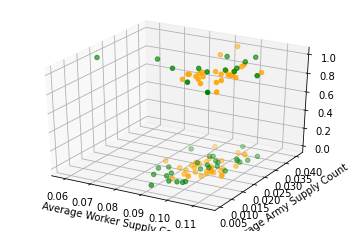

In [534]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# [float(char) for char in score_distributions[i]]
for i in range(num_clusters):
    ax.scatter(worker_distributions[i], army_distributions[i], [float(char) for char in outcome_distributions[i]] ,c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()